Img size is (529, 600, 3)


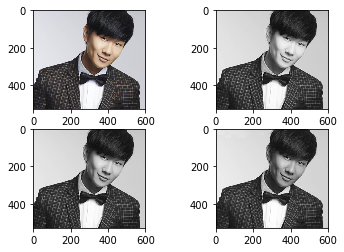

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('JJ.png')
img_arr = np.array(img, np.float32)
print('Img size is {}'.format(img_arr.shape))

plt.figure(1)
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(img_arr[:, :, 0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(img_arr[:, :, 1], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(img_arr[:, :, 2], cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
img_arr.shape

(529, 600, 3)

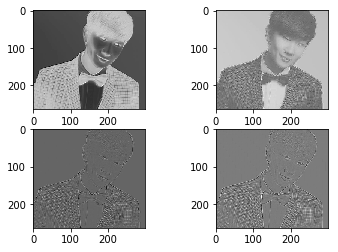

In [8]:
import tensorflow as tf

img_single = np.array(img_arr[:, :, 1]).reshape(1, 529, 600, 1)
X = tf.placeholder(tf.float32, shape=(None, 529, 600, 1))

filter_1 = np.array([[-1, -1, 0], [-1, 0, -1], [0, 1, 1]]).reshape(3, 3, 1, 1)
filter_2 = np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]]).reshape(3, 3, 1, 1)
filter_3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]).reshape(3, 3, 1, 1)
filter_4 = np.array([[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, 24, -1, -1], [-1, -1, -1, -1, -1],
                     [-1, -1, -1, -1, -1]]).reshape(5, 5, 1, 1)

conv_1 = tf.nn.conv2d(X, filter=filter_1, strides=[1, 2, 2, 1], padding='VALID')
conv_2 = tf.nn.conv2d(X, filter=filter_2, strides=[1, 2, 2, 1], padding='VALID')
conv_3 = tf.nn.conv2d(X, filter=filter_3, strides=[1, 2, 2, 1], padding='VALID')
conv_4 = tf.nn.conv2d(X, filter=filter_4, strides=[1, 2, 2, 1], padding='VALID')

with tf.Session() as sess:
    conv_1_val = sess.run(conv_1, feed_dict={X: img_single})
    conv_2_val = sess.run(conv_2, feed_dict={X: img_single})
    conv_3_val = sess.run(conv_3, feed_dict={X: img_single})
    conv_4_val = sess.run(conv_4, feed_dict={X: img_single})

plt.figure(2)
plt.subplot(221)
plt.imshow(conv_1_val[0, :, :, 0], cmap='gray')
plt.subplot(222)
plt.imshow(conv_2_val[0, :, :, 0], cmap='gray')
plt.subplot(223)
plt.imshow(conv_3_val[0, :, :, 0], cmap='gray')
plt.subplot(224)
plt.imshow(conv_4_val[0, :, :, 0], cmap='gray')
plt.savefig('conv.png')
plt.show()
